# 정규표현식 실습

## 실습 개요


(실습) 정규표현식 실습하기 <br>
1) 실습 목적 <br>
 이번 실습에서는 텍스트 전처리에서 미세한 핸들링을 위해 사용되는 정규표현식을 알아봅니다. 정규표현식은 텍스트 처리에 매우 유용한 도구로, 다양한 패턴을 검색하고 추출하는 데 도움을 줍니다<br>

 2) 수강 목표
  - 정규표현식의 필요성과 사용 형태를 이해할 수 있다
  - 정규표현식에서 사용되는 메타문자, 특수문자, 규칙 등의 세부 요소들을 활용할 수 있다

### 실습 목차

* 1. 정규표현식
  * 1-1. Basic
  * 1-2. 메타문자와 Flag
    * 1-2-1 특수문자
    * 1-2-2 문자집합
    * 1-2-3 Flag
  * 1-3. OR과 반복
  * 1-4. 치환
  * 1-5. 활용
  

## 1. 정규표현식

```
💡 목차 개요 : 정규표현식에서 사용되는 문법과 기호들을 파악하고 직접 적용해봅니다
```

- 1-1 파이썬의 re 패키지에서 사용되는 여러 함수들을 둘러봅니다
- 1-2 정규표현식 처리시 알아야하는 기초적인 메타문자와 flag개념들을 숙지합니다
- 1-3 두개 이상의 규칙들을 한번에 처리하는 방법을 이해합니다
- 1-4 텍스트에서 원하는 부분만 남기고 제외하거나, 필요한 부분만 추출하는 방법에 대해 알아봅니다
- 1-5 실제로 텍스트 전처리에서 정규표현식이 어떻게 작성되어 사용되는지 예제를 통해 확인합니다


### 1-1. Basic

> 파이썬의 re 패키지는 정규표현식을 효율적으로 사용하기 위한 여러 함수들을 제공합니다. 이번 장에서는 re에서 제공하는 기본 메소드들에 대해서 알아봅니다



파이썬에는 기본 내장 패키지로써 별도의 설치 없이 정규표현식 패키지인 're' 패키지를 사용할 수 있습니다

In [ ]:
import re

**re.match(pattern, string, flags)**

+ re.match 함수는 “문자열의 처음”부터 시작하여 패턴이 일치되는 것이 있는지를 확인합니다
+ 아래 예시에서 첫번째는 문자열이 ‘a’로 시작하기 때문에 매치가 됩니다. 반면, 나머지 두 개는 ‘a’로 시작하지 않아 패턴 a와 매치되지 않습니다. 매치되지 않을 때 re.match 함수는 None을 반환합니다

In [ ]:
print(re.match('a', 'aba'))
print(re.match('a', 'bbb'))
print(re.match('a', 'baa'))

<re.Match object; span=(0, 1), match='a'>
None
None


**re.search(pattern, string, flags)**

+ re.search 함수는 re.match와 비슷하지만, 반드시 문자열의 처음부터 일치해야 하는 것은 아닙니다
+  re.search 함수는 문자열의 처음뿐 아니라 중간부터라도 패턴과 일치되는 부분이 있는지를 찾습니다. 따라서 세 번째 문자열 ‘baa’의 경우 1번째 index(두 번째 문자) ‘a’와 매치됩니다

In [ ]:
print(re.search('a', 'aba'))
print(re.search('a', 'bbb'))
print(re.search('a', 'baa'))

<re.Match object; span=(0, 1), match='a'>
None
<re.Match object; span=(1, 2), match='a'>


**re.findall(pattern, string, flags)**

+ re.findall 함수는 문자열 중 패턴과 일치되는 모든 부분을 찾습니다
+ 문자열중 모든 부분에 대해 겹치는 부분을 모두 반환합니다

In [ ]:
print(re.findall('a', 'aba'))
print(re.findall('a', 'bbb'))
print(re.findall('a', 'baa'))
print(re.findall('aaa', 'aaaa'))

['a', 'a']
[]
['a', 'a']
['aaa']


**re.finditer(pattern, string, flags)**

+ re.findall과 비슷하지만, 일치된 문자열의 리스트 대신 matchObj 리스트를 반환합니다
+ iterator 형태로 일치되는 부분의 object를 모두 반환하며, for문을 통해 일치된 위치와 매칭된 문자열을 모두 반환받을 수 있습니다

In [ ]:
matchObj_iter = re.finditer('a', 'baa')
print(matchObj_iter)

for matchObj in matchObj_iter:
    print(matchObj)

<re.Match object; span=(1, 2), match='a'>
<re.Match object; span=(2, 3), match='a'>


**re.fullmatch(pattern, string, flags)**

+ re.fullmatch는 패턴과 문자열이 남는 부분 없이 완벽하게 일치하는지를 검사합니다
+ 완벽하게 일치하지 않을 경우, None을 반환합니다

In [ ]:
print(re.fullmatch('a', 'aba'))
print(re.fullmatch('a', 'bbb'))
print(re.fullmatch('a', 'baa'))
print(re.fullmatch('aaa', 'aaa')) # 완벽하게 일치되므로 리턴

None
None
None
<re.Match object; span=(0, 3), match='aaa'>


### 1-2. 메타문자와 Flag

> 정규표현식에서 메타문자는 특별한 의미를 가지며 패턴 매칭에 사용되는 문자들을 말합니다. 이러한 메타문자들은 정규표현식의 강력한 도구로 활용됩니다. 또한 정규표현식에서는 플래그(Flag)라는 옵션을 사용하여 검색 패턴을 수정하거나 특정 동작을 지정할 수 있습니다. 플래그는 정규표현식 패턴의 옵션을 설정하는 데 사용되며, 주로 검색 대소문자 구분, 다중 행 매칭 등을 제어하는 데 활용됩니다

#### 1-2-1 특수문자

+ 정규표현식에는 다양한 특수문자들이 존재합니다. 각 특수 문자들은 패턴 매칭에 있어서 매우 중요한 역할을 수행하며, 정규표현식을 사용할때만의 규칙이자 문법으로써 작용합니다

**[ ] 대괄호:여러 문자 중 하나와 일치**

+ 대괄호 [와 ] 사이에 원하는 문자를 여러 개 넣으면, 문자열이 넣은 문자 중 하나와 일치하면 매칭이 이루어집니다
+ 여기서 중요한 것은 [ ] 안에 얼마나 많은 문자 종류가 있는지에 상관없이 딱 한 문자와 일치된다는 것 입니다
+ 예를 들어 정규식 표현이 [abc]이고 문자열이 ‘a’이면 re.match는 매칭에 성공합니다. 문자열이 ‘b’이거나 ‘c’이어도 마찬가지 입니다. 다만 문자열이 ‘d’이거나 ‘가나다’ 같은 것이면 매칭이 되지 않습니다

In [ ]:
matchObj = re.fullmatch("You[;']re studying re module[.,]", \
                        'You;re studying re module,')
print(matchObj)

<re.Match object; span=(0, 26), match='You;re studying re module,'>


사실 대괄호 [ ]에는 다른 기능이 더 있습니다. 문자 -는 대괄호 안에서는 메타문자 역할을 합니다

하이픈 -는 범위를 형성합니다. 예를 들어 [a-z]는 알파벳 소문자 중 하나이기만 하면 매칭이 됩니다. 또 [A-Z], [0-9]는 각각 알파벳 대문자와 숫자 하나에 매칭됩니다.
물론 위의 경우뿐만 아니라 넓은 범위도 가능합니다. [가-힣]의 경우는 한글 한 글자에 일치됩니다.
[A-z]는 영문 대소문자와 몇 개의 특수문자를 포함합니다

In [ ]:
matchObj = re.search('Why [a-z]o serious\?', 'Why so serious?')
print(matchObj)
matchObj = re.search('[a-z ]', 'Why so serious?')
print(matchObj)

<re.Match object; span=(0, 15), match='Why so serious?'>
<re.Match object; span=(1, 2), match='h'>


**. 마침표: 모든 문자와 일치**

+ 모든 문자와 일치하는 정규표현식은 마침표 . 입니다. 모든 문자와 일치를 시키고 싶을때는 마침표 . 를 사용합니다

In [ ]:
matchObj = re.findall('r..n[.]', 'ryan. ruin rain round. reign')
print(matchObj)

['ryan.']


#### 1-2-2 문자집합

+ 정규표현식에서는 알파벳 중 일부 문자들은 \(백슬래시)와 함께 특수한 경우를 나타내는 일종의 기호 역할을 합니다
+ 이 문자들을 통해 정규표현식은 여러 상황에서 문자들을 대변할 수 있습니다

**\w, \W: 단어 문자, 비 단어 문자**

+ \w는 단어 문자 1개와 일치됩니다. 단어 문자는 영문 대소문자, 숫자 0-9, 언더바 ‘_’ 를 포함합니다

+ \W는 단어 문자 이외의 문자 1개에 일치됩니다. 즉 공백 문자, 특수 문자 등에 일치된다고 보면 됩니다. \w와 정확히 반대의 역할을 합니다

첫번째 경우에서는 \w가 세번 연속으로 있다보니, a_가 에 패턴이 일치했습니다. 하지만 두번째의 경우 가운데는 \W 로 문자 사이에 문자가 아닌 것에 일치되어야합니다. 따라서 이경우에는 단어 문자(a) / 비 단어 문자( ) / 단어 문자(a) 인 a a에 일치되었습니다

In [ ]:
matchObj = re.search('\w\w\w', 'a_가')
print(matchObj)
matchObj = re.findall('\w\W\w', 'a (a a')
print(matchObj)

<re.Match object; span=(0, 3), match='a_가'>
['a a']


**d, \D: 숫자 문자, 비 숫자 문자**

+ \d는 숫자 문자 1개에 일치됩니다
+ 마찬가지로 \D는 비 숫자 문자 1개에 일치됩니다

In [ ]:
matchObj = re.search('\d\d', '12abc34') # 연속된 숫자 2개에 대해 일치
print(matchObj)
matchObj = re.findall('\d\d\D\D', '11aa11c1') # 연속된 숫자 2개+연속된 비숫자문자 2개에 일치
print(matchObj)

<re.Match object; span=(0, 2), match='12'>
['11aa']


**\s, \S: 공백 문자, 비 공백 문자**

+ \s는 공백 문자(빈칸 ‘ ‘, 탭 ‘\t’, 개행 ‘\n’) 1개에 일치됩니다
+ 마찬가지로 \S는 \s의 반대 역할입니다. 즉, 공백 문자 이외의 모든 문자 1개에 일치됩니다

In [ ]:
matchObj = re.search(
    'Oh\smy\sgod\s\S',
    '''Oh my\tgod
!''')
print(matchObj)

<re.Match object; span=(0, 11), match='Oh my\tgod\n!'>


**^**

+ ^ 메타 문자는 문자열의 맨 처음과 일치한다는 것을 의미합니다
+ 추후 살펴볼 컴파일 옵션 re.MULTILINE을 사용할 경우에는 여러 줄의 문자열일 때 각 줄의 처음과 일치하게 됩니다

In [ ]:
print(re.search('^Life', 'Life is too short')) # Life로 시작하는 단어에 대해 일치
print(re.search('^Life', 'My Life'))

<re.Match object; span=(0, 4), match='Life'>
None


**$**

+ $ 메타 문자는 ^ 메타 문자와 반대의 경우입니다

+ 즉, $는 문자열의 끝과 매치한다는 것을 의미합니다

In [ ]:
print(re.search('short$', 'Life is too short')) # short가 마지막에 와야 일치
print(re.search('short$', 'Life is too short, you need python'))

<re.Match object; span=(12, 17), match='short'>
None


#### 1-2-3 Flag

+ Flag는 정규표현식 패턴과 더불어 더욱 편리하게 매칭을 지원하기 위한 여러 기능들을 지원합니다

+ 여러 flag들이 있지만 이번에는 자주 사용되는 flag 일부들에 대해서만 알아보겠습니다

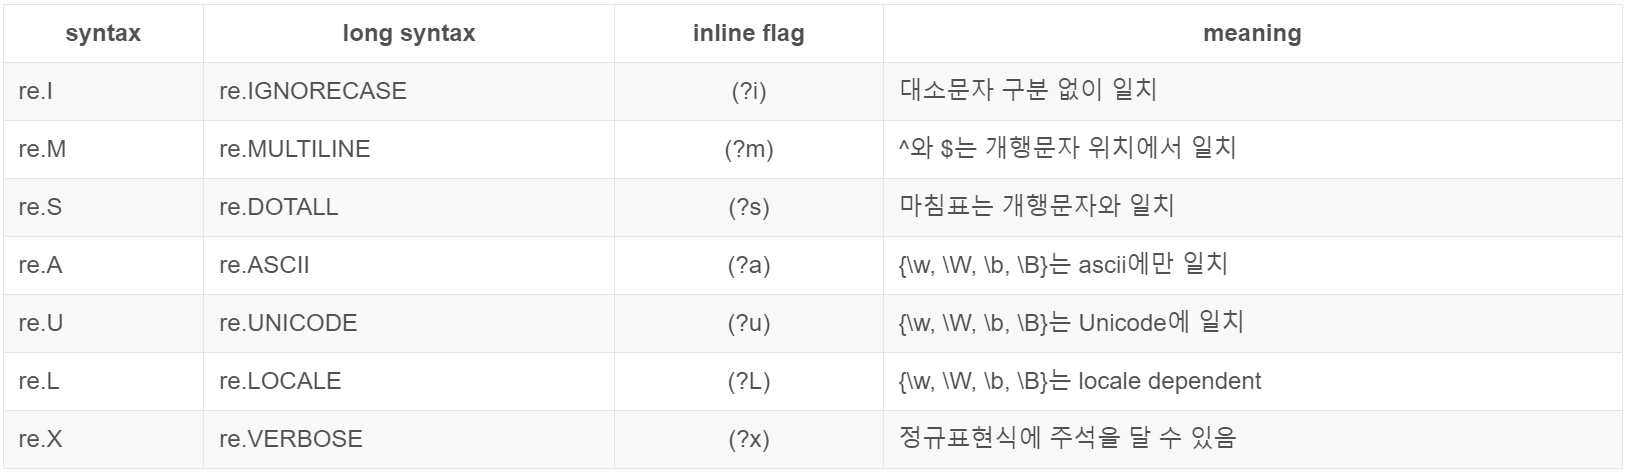

**IGNORECASE, I**

+ re.I / re.IGNORECASE 플래그는 대소문자를 구분하지 않고 문자에 일치시킵니다. 따라서 패턴을 [a-z]로 동일하게 주었음에도 p과 P에 모두 일치하는 것을 확인할 수 있습니다

In [ ]:
print(re.match('[a-z]','p', re.I))
print(re.match('[a-z]','P'))
print(re.match('[a-z]','P', re.I))

<re.Match object; span=(0, 1), match='p'>
None
<re.Match object; span=(0, 1), match='P'>


**DOTALL, S**

+ . 메타 문자는 줄바꿈 문자(\n)를 제외한 모든 문자와 매치되는 규칙이 있습니다. 만약 \n 문자도 포함하여 매치하고 싶다면 re.DOTALL 또는 re.S 옵션을 사용해 정규식을 사용하면 됩니다
+ 정규식이 a.b인 경우 문자열 a\nb는 매치되지 않습니다. \n은 . 메타 문자와 매치되지 않기 때문입니다. 따라서 \n 문자와도 매치되게 하려면 다음과 같이 re.DOTALL 옵션을 사용해야 합니다
+ 보통 re.DOTALL 옵션은 여러 줄로 이루어진 문자열에서 줄바꿈 문자에 상관없이 검색할 때 많이 사용합니다

In [ ]:
print(re.match('a.b', 'a\nb'))
print(re.match('a.b', 'a\nb', re.S))

None
<re.Match object; span=(0, 3), match='a\nb'>


**MULTILINE, M**

+ re.MULTILINE 또는 re.M 옵션은 이전에 설명한 메타 문자인 ^, $와 연관된 옵션입니다

+ 예를 들어 정규식이 ^python인 경우, 문자열의 처음은 항상 python으로 시작해야 매치되고 만약 정규식이 python$이라면 문자열의 마지막은 항상 python으로 끝나야 매치된다는 의미입니다

+ 이부분은 예제를 통해 설명하겠습니다

정규식 ^python\s\w+은 python이라는 문자열로 시작하고 그 뒤에 화이트 스페이스, 그 뒤에 단어가 와야 한다는 의미입니다. 따라서 ^ 메타 문자에 의해 python이라는 문자열을 사용한 첫 번째 줄만 매치됩니다

In [ ]:
data = """python one
life is too short
python two
you need python
python three"""

print(re.findall('^python\s\w+',data))

['python one']


그렇지만 ^ 메타 문자를 문자열 전체의 처음이 아니라 각 라인의 처음으로 인식시키고 싶은 경우도 있을 것입니다. 이럴 때 사용할 수 있는 옵션이 바로 re.MULTILINE 또는 re.M입니다

In [ ]:
print(re.findall('^python\s\w+',data, re.M))

['python one', 'python two', 'python three']


re.MULTILINE 옵션으로 인해 ^ 메타 문자가 문자열 전체가 아닌 각 줄의 처음이라는 의미를 가지게 되었습니다. 즉, re.MULTILINE 옵션은 ^, $ 메타 문자를 문자열의 각 줄마다 적용해 줍니다

### 1-3. OR과 반복

> 같은 문자 또는 패턴이 여러개 존재할때 이를 반복해서 나타내기보다는 정규표현식에서 정의하고있는 문자들을 통해 OR 옵션 또는 반복 옵션을 줄 수 있습니다


**| : 다자택일**

+ 여러 패턴들을 or 조건으로 구분합니다. 나열된 조건들 중 한가지만 맞아도 패턴은 정상적으로 일치됩니다
+ 일반적으로 OR 조건들에서 순서는 큰 의미가 없지만, 순서를 유념해야하는 경우가 몇몇 존재합니다

In [ ]:
matchObj = re.findall('one|two|three', 'one four two three zero')
print(matchObj)

['one', 'two', 'three']


아래 예제를 보면 oneself가 있음에도 oneself에 일치되지 않았습니다. 그 이유는 이미 앞서 출현한‘one’을 찾아버렸고, 정규식은 overlapping된 부분을 또 찾지 않기 때문입니다. 따라서‘one’을 찾고 나서 남은 문자열은 ‘self is the one thing.’입니다. 따라서 남은 문자열에서는 더 이상 oneself를 찾을 수 없습니다

In [ ]:
matchObj = re.findall('one|oneself|onerous', 'oneself is the one thing.') # one 또는 oneself 또는 onerous에 일치
print(matchObj)

['one', 'one']


**\* : 0회 이상 반복**

+ 어떤 문자나 기호 뒤에 *(asterisk)를 붙이면 그 문자가 0회이상 반복됨을 의미합니다


0회 이상 반복을 의미하기 때문에, 아예 존재하지 않는 경우도 고려할 수 있습니다. 이 경우에도 매칭은 성공합니다. 또한 마침표 . 뒤에 *을 쓰면 항상 텍스트 전체와 매칭을 할 수 있습니다

In [ ]:
print(re.match('a*', '')) # a가 0개여도 일치
print(re.match('a*', 'a'))
print(re.search('a*', 'aaaa')) # a가 0개이상이므로 일치
print(re.fullmatch('a*', 'aaaaaa'))
print(re.findall('a*', 'aaabaaa aa  ')) # 모든 a에 대해 일치

matchObj = re.search('<p>.*</p>', '<p> Lorem ipsum... is boring. </p>') # <p>와 </p>사이에 존재하는 0개이상의 모든 문자에 대해 일치
print(matchObj)

<re.Match object; span=(0, 0), match=''>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 4), match='aaaa'>
<re.Match object; span=(0, 6), match='aaaaaa'>
['aaa', '', 'aaa', '', 'aa', '', '', '']
<re.Match object; span=(0, 34), match='<p> Lorem ipsum... is boring. </p>'>


**+ : 1회 이상 반복**

+ *과 비슷하지만 무조건 한 번이라도 등장해야 합니다. 0번의 경우는 포함하지 않습니다

In [ ]:
print(re.match('a+', '')) # 한번도 나타나지 않으므로 불일치
print(re.match('a+', 'a'))
print(re.search('a+', 'aaaa'))
print(re.fullmatch('a+', 'aaaaaa'))
print(re.findall('a+', 'aaabaaa aa  '))

matchObj = re.search('<p>.+</p>', '<p> Lorem ipsum... is boring. </p>') # <p>와 </p>사이에 존재하는 1개이상의 모든 문자에 대해 일치
print(matchObj)

None
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 4), match='aaaa'>
<re.Match object; span=(0, 6), match='aaaaaa'>
['aaa', 'aaa', 'aa']
<re.Match object; span=(0, 34), match='<p> Lorem ipsum... is boring. </p>'>


**{n, m} : 지정 횟수만큼 반복**

+ 중괄호는 지정한 횟수만큼 정규식을 반복시킵니다. 몇개 이상 또는 이하의 정해진 수를 지정해야할 때 유용합니다.
+ 이 쓰임으로 중괄호를 쓸 때 쓰는 방법은 세 가지가 있습니다 <br>

1. {n} : 정확히 n회만큼 반복 <br>
2. {n, m} : n회 이상 m회 이하 반복 <br>
3. {n, } : n회 이상 반복. 무한히 일치가 가능

In [ ]:
print(re.search('a{3}', 'aaaaa')) # 3개의 연속된 a에 대해일치
print(re.findall('a{3}', 'aaaaaaaa')) # 3개의 연속된 a에 대해일치
print(re.findall('a{2,4}', 'a aa aaa aaaa aaaaa')) # 2개이상 4개이하의 연속된 a에 대해일치
print(re.findall('a{2,}', 'a aa aaa aaaa aaaaa')) # 2개이상의 연속된 a에 대해 일치

<re.Match object; span=(0, 3), match='aaa'>
['aaa', 'aaa']
['aa', 'aaa', 'aaaa', 'aaaa']
['aa', 'aaa', 'aaaa', 'aaaaa']


**? : 0회 또는 1회 반복**

+ ?는 {0,1}과 같습니다

In [ ]:
print(re.findall('ab?a', 'aa aba aaaa')) # a뒤의 b가 0개이상 1개이하인 경우+a인 경우에 대해 일치 (aba)

['aa', 'aba', 'aa', 'aa']


### 1-4 치환

> 이번 파트에서는 문자열에서 조건에 맞는 부분을 직접적으로 바꾸거나 제외하는 치환이라는 메소드에대해 알아봅니다. 정규표현식을 통해 수정하고싶은 텍스트 포맷을 정의해주면 주변 텍스트는 그대로 둔채 해당 부분만 조작할 수 있습니다

일반적으로 우리는 replace문을 이용해서 원하는 텍스트를 다른 부분으로 변환할 수 있습니다. 하지만 이는 항상 exact match가 되어야만 가능합니다. 따라서 완전히 일치하지 않는 경우에는 사용이 불가능한데, 이때 사용하는 것이 정규표현식의 치환 메소드입니다

In [ ]:
origin_str = 'Ryan keep a straight face.'
edited_str = origin_str.replace('keep', 'kept')
print(edited_str)

Ryan kept a straight face.


**re.sub(pattern, repl, string, count, flags)**

+ 패턴을 입력(pattern)하고 무엇으로 바꿀지(repl) 설정합니다
+ 또한 count 인자를 통해 최대 몇번까지 바꿀지도 지정할 수 있습니다

In [ ]:
print(re.sub('\d{4}', 'XXXX', '010-1234-5678')) # 연속된 4개의 숫자를 XXXX로 변경
print(re.sub('[0-9]{3,4}', 'XXXX', '010-1234-5678')) # 연속된 3개이상 4개이하의 숫자를 XXXX로 변경

010-XXXX-XXXX
XXXX-XXXX-XXXX


count 인자를 적어주면 횟수를 제한할 수 있으며 적지 않는 경우에는 모든 일치부를 전부 치환합니다

In [ ]:
print(re.sub(pattern='Gorio', repl='Ryan', count=2, \
             string='Gorio, Gorio, Gorio keep a straight face.')) # 최대 2개 까지 Gorio를 Ryan으로 치환

Ryan, Ryan, Gorio keep a straight face.


원하는 부분을 '' 로 제거할 수 도 있습니다

In [ ]:
print(re.sub('Tube', '', 'Tube Ryan')) # Tube 제거

 Ryan


**re.subn(pattern, repl, string, count, flags)**

+ 기본적으로 re.sub와 동일하지만 re.subn은 리턴하는 값이 치환된 문자열과 더불어 치환된 개수의 튜플이라는 것이 다릅니다

In [ ]:
print(re.subn(pattern='Gorio', repl='Ryan', \
              string='Gorio, Gorio, Gorio keep a straight face.'))

('Ryan, Ryan, Ryan keep a straight face.', 3)


이번에는 문자열 치환 시 그냥 text가 아닌 일치된 부분을 재사용하는 방법을 알아보겠습니다. 아래 예제에서는 정규식이 url 주소 두가지에 모두 일치되었습니다. 이때 앞에 [링크]라는 문자열을 넣어주고싶다면 \g<0> 토큰을 사용해 일치부를 치환해서 표현할 수 있습니다

In [ ]:
print(re.sub('https?://\S+',
             '[링크](\g<0>)',
             'http://www.google.com and https://lullulala.github.io'))

[링크](http://www.google.com) and [링크](https://lullulala.github.io)


또한 변환하고 싶은 치환부가 여러가지일 경우, 괄호 () 와 함께 \1, \2, \3 이런식으로 나타내어 참조할 수 있습니다. 단 \1과 같은 표현을 사용할 경우 repl 부분에 r을 반드시 사용해야합니다

In [ ]:
print(re.sub('(\d{4})-(\d{2})-(\d{2})',
             r'\1.\2.\3',
             '1900-01-01')) # \1은 맨앞 (\d{4}) \2는 가운데 (\d{4}) \3는 마지막 (\d{4})를 의미

1900.01.01


**re.split**

+ re.split은 우리가 일반적으로 사용하는 내장함수 split에 정규표현식을 입힌 형태입니다
+ 정규표현식에 매칭되는 포맷을 기준으로 문자열을 split할 수 있습니다

이번 예시는 html 태그 내에서 태그를 제외한 부분으로 split하는 예시입니다.


대괄호 [ ] 안에 a-z로 알파벳 전부와 / 를 넣어서 태그들의 규칙을 표현했습니다

In [ ]:
print(re.split('<[a-z/]+>',
               '<html> Wow <head> header </head> <body> Hey </body> </html>'))

['', ' Wow ', ' header ', ' ', ' Hey ', ' ', '']


### 1-5 활용

> 이번에는 지금까지 배운 것들을 바탕으로 실제로 정규표현식을 사용해 텍스트를 정제하는 예제들을 확인해보겠습니다. 메타문자와 Flag, 문자집합과 여러 메소드들을 적절히 조합하면 규칙성있는 텍스트 형태들을 무수히 표현할 수 있습니다

이름과 이메일 주소, 주민번호가 섞여있는 텍스트에서 먼저 주민번호를 추출해보겠습니다

In [ ]:
text = '이름은 홍길동이고 이메일주소는 Ghd_RlfEhd224@gmail.com, 주민번호는 940215-1134003 입니다.'

print(re.findall('\d{2}[0-1]\d{1}[0-3]\d{1}-[1-4]\d{6}',text))

['940215-1134003']


먼저 주민번호의 맨앞 두자리는 생년을 뜻합니다

`< 생년월 >` <br>
생년은 숫자 두개로 표현되는 \d{2}로 표현합니다. 다음으로 월의 앞자리는 0또는 1로 구분됩니다. 따라서 [0-1]로 표현이 가능합니다. 월의 두번째 자리에는 어떤 숫자든 올수 있으니 \d{1}로 표현합니다. 이러면 9402까지는 표현이 끝납니다

`< 일 >` <br>
일자는 1부터 31일까지 존재합니다. 따라서 일의 앞자리는 [0-3]중 한 글자, 뒷자리는 \d{1}로 표현할 수 있습니다. 그 뒤에 주민번호의 앞자리와 뒷자리를 구분하는 하이픈 - 이 위치합니다

`< 뒷자리 >` <br>
뒷자리의 맨 앞에는 1,2,3,4 만 올 수 있습니다. 따라서 [1-4]로 표현이 가능합니다. 그 뒤 6자리는 대부분의 숫자들이 올 수 있으므로 자릿수만 맞추어 \d{6}만 표현해줍니다


=> 이렇게 정규표현식을 사용하면 주민번호에 해당하는 부분만 추출할 수 있습니다

이번에는 이메일 주소의 앞부분만을 익명화 시켜서 가려보도록 하겠습니다

In [ ]:
print(re.sub('[a-zA-Z0-9_]+(@[a-z]+\.com)',r'XXXX\1',text))

이름은 홍길동이고 이메일주소는 XXXX@gmail.com, 주민번호는 940215-1134003 입니다.


이메일 주소에는 일반적으로 알파벳(a-zA-Z), 언더바(_), 숫자(0-9) 가 포함됩니다. 수는 정해져있지 않고 한개 이상이니 모두를 대괄호로 묶어준뒤 + 표시를 하면 나타낼 수 있습니다. 뒷부분엔 항상 @가 붙고 이메일에 따라 뒷부분이 정해집니다. 따라서 [a-z]+로 처리하고 \.로 마침표를 나타내줍니다. 그 후 마지막에 붙는 com을 입력해주면 이메일 형식의 정규식이 완성됩니다

이제 이메일 패턴을 일치시켰으니, 치환메소드를 이용해서 괄호 () 가 나타내는 부분을 재현시키고 앞에 XXXX를 붙여 익명화시키면됩니다. 이것은 repl 부분에 r'XXXX\1'으로 구현할 수 있습니다

한가지만 더 해보겠습니다. 이전 예제에서는 원하는 부분을 추출하거나 원하는 부분을 조작하는 것을 다루었다면, 이번에는 원하지 않는 부분을 조작하는 예제를 해보도록하겠습니다

In [ ]:
text = '아 이영화 정말 핵jam 인것 같닼ㅋㅋㅋㅋㅋ진짜... 내가 근 1년간 본 영화중에 제일 재밌었어요!!!!♥ㅎㅎㅎ'

이번 예제에서는 영어, 한국어, 특수문자와 숫자가 모두 혼재되어있습니다. 여기서 무의미하다고 판단되는 한글 자모음, 특수문자를 제거하는 것을 해보겠습니다

In [ ]:
re.sub('[^가-힣a-z0-9 ]+',' ',text).strip()

'아 이영화 정말 핵jam 인것 같닼 진짜  내가 근 1년간 본 영화중에 제일 재밌었어요'

대괄호 안에 ^가 들어가게되면 괄호 내부에서 정의한 문자들을 제외한 문자들을 의미하게됩니다. 내부에서 가-힣으로 한글(자모), a-z 알파벳, 0-9로 숫자와 빈칸으로 공백을 정의했기 때문에 특수문자와 불필요한 한글 자음들을 의미하는 표현식이 됩니다. 이를 ' ' 공백으로 치환해주면 원하는 깨끗한 텍스트를 얻을 수 있습니다

#Reference

- [Gorio Tech](https://greeksharifa.github.io/%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D(re)/2018/07/20/regex-usage-01-basic/)

## Required Package

+ re



## 콘텐츠 라이선스

저작권 : <font color='blue'> <b> ©2023 by Upstage X fastcampus Co., Ltd. All rights reserved.</font></b>

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 업스테이지 및 패스트캠퍼스에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. </b>